In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex

In [2]:
df = pd.read_csv('/content/BTC-USD (1).csv')

In [3]:
df.head()


Date         Open         High          Low        Close  \
0  2020-01-27  8597.308594  8977.726563  8597.308594  8909.819336   
1  2020-01-28  8912.524414  9358.589844  8908.447266  9358.589844   
2  2020-01-29  9357.470703  9406.431641  9269.467773  9316.629883   
3  2020-01-30  9316.016602  9553.125977  9230.897461  9508.993164   
4  2020-01-31  9508.313477  9521.706055  9230.776367  9350.529297   

     Adj Close       Volume  
0  8909.819336  28647338393  
1  9358.589844  34398744403  
2  9316.629883  30682598115  
3  9508.993164  32378792851  
4  9350.529297  29432489719

In [4]:
df.tail()

Date          Open          High           Low         Close  \
1092  2023-01-23  22721.087891  23126.486328  22654.304688  22934.431641   
1093  2023-01-24  22929.626953  23134.011719  22549.744141  22636.468750   
1094  2023-01-25  22639.267578  23722.099609  22406.076172  23117.859375   
1095  2023-01-26  23108.955078  23237.078125  22911.373047  23032.777344   
1096  2023-01-27  23024.886719  23061.599609  22672.636719  22787.208984   

         Adj Close       Volume  
1092  22934.431641  26518700512  
1093  22636.468750  26405069715  
1094  23117.859375  30685366709  
1095  23032.777344  26357839322  
1096  22787.208984  26344077312

In [5]:
df.describe()

Open          High           Low         Close     Adj Close  \
count   1097.000000   1097.000000   1097.000000   1097.000000   1097.000000   
mean   29158.349554  29879.468256  28350.783723  29167.117262  29167.117262   
std    16889.037119  17338.059261  16355.101722  16873.252248  16873.252248   
min     5002.578125   5331.833984   4106.980957   4970.788086   4970.788086   
25%    13108.063477  13612.047852  12932.250977  13271.285156  13271.285156   
50%    23652.070313  24127.414063  23009.949219  23656.207031  23656.207031   
75%    42944.976563  43903.019531  41982.617188  42892.957031  42892.957031   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  1.097000e+03  
mean   3.660497e+10  
std    1.899340e+10  
min    7.714767e+09  
25%    2.530321e+10  
50%    3.292264e+10  
75%    4.321097e+10  
max    3.509679e+11

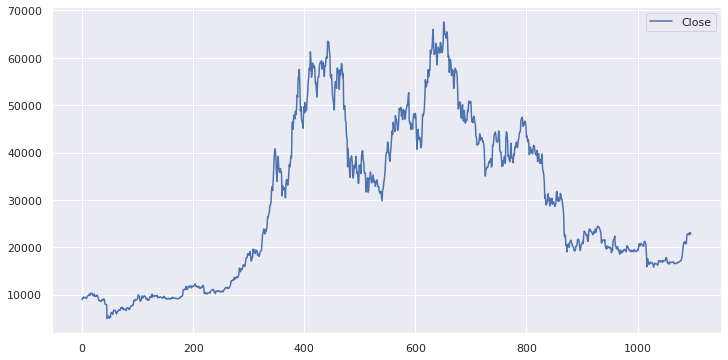

In [6]:
df[['Close']].plot(figsize=(12,6));


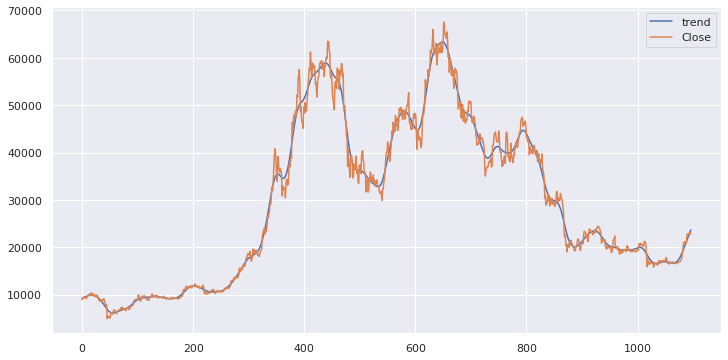

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
gdp_cycle, gdp_trend = hpfilter(df['Close'], lamb=1600)
df['trend'] = gdp_trend
df[['trend','Close']].plot(figsize=(12,6))
#tendencia

In [8]:
sts.adfuller(df.Close)
#no se rechaza la hipotesis nula
#la serie no es estacionaria

(-1.507168360904125,
 0.5299623197953374,
 0,
 1096,
 {'1%': -3.4363305491063763,
  '5%': -2.864180690211292,
  '10%': -2.5681759880987265},
 18422.47338092311)

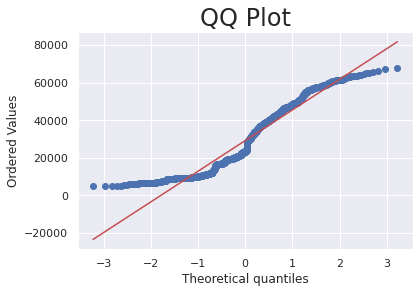

In [9]:
import scipy.stats

scipy.stats.probplot(df.Close, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

In [10]:
df['returns'] = df.Close.pct_change(1)*100

In [11]:
df['sq_returns'] = df.returns.mul(df.returns)


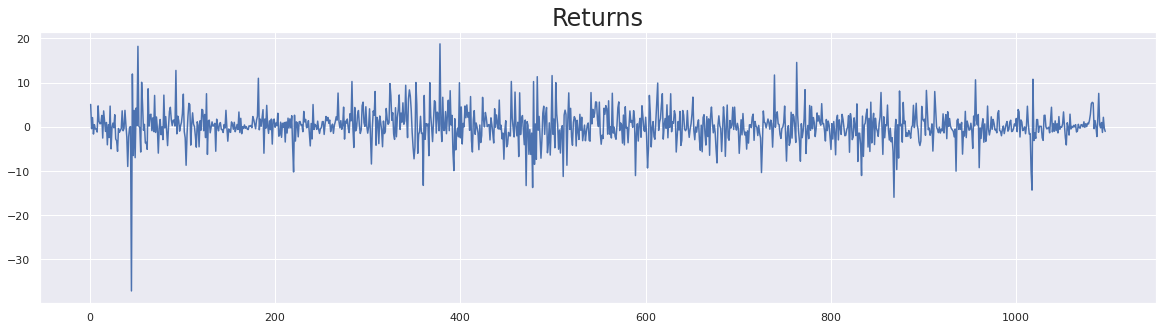

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()


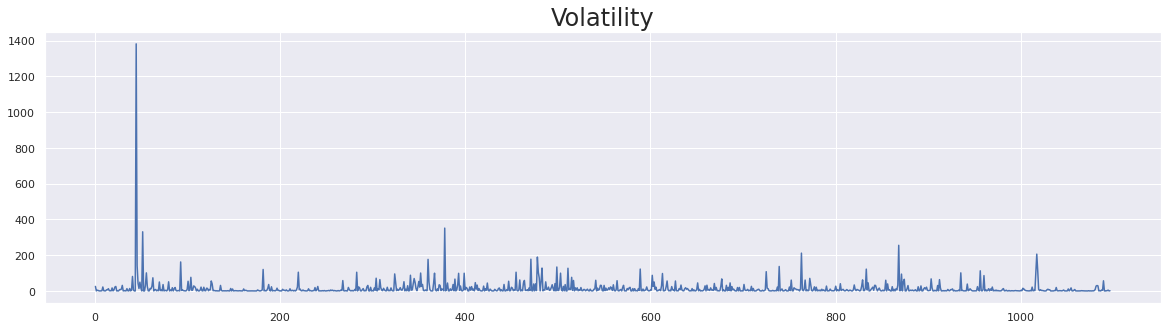

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

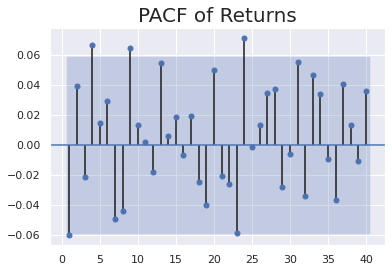

In [14]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

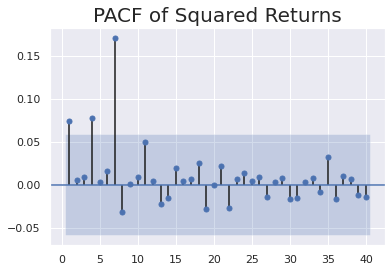

In [15]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [16]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 18.9 MB/s eta 0:00:00


In [17]:
from arch import arch_model


In [18]:
display(Math(r'\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p \alpha_1\in_{t-1}^2'))
#Modelo ARCH

<IPython.core.display.Math object>

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 1)
results_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3112.969195644465
Iteration:      2,   Func. Count:     11,   Neg. LLF: 3013.921857394102
Iteration:      3,   Func. Count:     16,   Neg. LLF: 3029.0123625089473
Iteration:      4,   Func. Count:     22,   Neg. LLF: 3013.8115939198633
Iteration:      5,   Func. Count:     27,   Neg. LLF: 3008.9356391913925
Iteration:      6,   Func. Count:     31,   Neg. LLF: 3008.929095349186
Iteration:      7,   Func. Count:     35,   Neg. LLF: 3008.928930540169
Iteration:      8,   Func. Count:     38,   Neg. LLF: 3008.9289305406346
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3008.928930540169
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3008.93
Distribution:                  Normal   AIC:                           6023.86
Method:            Maximum Likelihood   BIC:                           6038.86
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1673      0.115      1.449      0.147 [-5.903e-02,  0.394]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         13.5855      1.839      7.387  1.500e-13    [  9.981, 17.190]
alpha[1]       0.0492  4.104e-02      1.199      0.230 [-3.123e-02,  0.130]
===========================================================================

Covariance estimator: robust
"""

In [20]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 3010.7480536450707
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3008.92508284637
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3008.93
Distribution:                  Normal   AIC:                           6025.85
Method:            Maximum Likelihood   BIC:                           6045.85
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1680      0.117      1.441      0.150 [-6.048e-02,  0.396]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         13.5785      1.862      7.291  3.075e-13      [  9.928, 17.229]
alpha[1]       0.0486  4.153e-02      1.170      0.242   [-3.281e-02,  0.130]
alpha[2]   1.0222e-03  9.620e-03      0.106      0.915 [-1.783e-02,1.988e-02]
=============================================================================

Covariance estimator: robust
"""

In [21]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 3013.0860732877477
Iteration:     10,   Func. Count:     70,   Neg. LLF: 3008.222575927747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3008.2214660755526
            Iterations: 14
            Function evaluations: 93
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3008.22
Distribution:                  Normal   AIC:                           6026.44
Method:            Maximum Likelihood   BIC:                           6051.44
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:43   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1830      0.122      1.502      0.133 [-5.582e-02,  0.422]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         13.2666      2.014      6.589  4.439e-11      [  9.320, 17.213]
alpha[1]       0.0489  4.231e-02      1.155      0.248   [-3.405e-02,  0.132]
alpha[2]   1.5029e-03  1.010e-02      0.149      0.882 [-1.828e-02,2.129e-02]
alpha[3]       0.0217  2.811e-02      0.770      0.441 [-3.343e-02,7.675e-02]
=============================================================================

Covariance estimator: robust
"""

In [22]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
results_arch_13.summary()

Iteration:      5,   Func. Count:     88,   Neg. LLF: 5287.354580616378
Iteration:     10,   Func. Count:    174,   Neg. LLF: 2960.8890013380123
Iteration:     15,   Func. Count:    261,   Neg. LLF: 2972.3301932252853
Iteration:     20,   Func. Count:    349,   Neg. LLF: 2950.327031456047
Iteration:     25,   Func. Count:    435,   Neg. LLF: 2948.8413183227694
Iteration:     30,   Func. Count:    516,   Neg. LLF: 2948.840223459495
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2948.840223459495
            Iterations: 31
            Function evaluations: 531
            Gradient evaluations: 31


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2948.84
Distribution:                  Normal   AIC:                           5927.68
Method:            Maximum Likelihood   BIC:                           6002.67
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2096      0.104      2.016  4.379e-02 [5.834e-03,  0.413]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          6.2192      1.570      3.962  7.441e-05      [  3.142,  9.296]
alpha[1]       0.0782  4.831e-02      1.618      0.106   [-1.652e-02,  0.173]
alpha[2]   2.5803e-03  1.280e-02      0.202      0.840 [-2.251e-02,2.767e-02]
alpha[3]   3.2666e-03  1.293e-02      0.253      0.801 [-2.208e-02,2.861e-02]
alpha[4]       0.2256      0.126      1.789  7.369e-02   [-2.163e-02,  0.473]
alpha[5]       0.0000  2.579e-02      0.000      1.000 [-5.056e-02,5.056e-02]
alpha[6]       0.0574  5.444e-02      1.055      0.292   [-4.929e-02,  0.164]
alpha[7]       0.0561  3.160e-02      1.776  7.578e-02   [-5.822e-03,  0.118]
alpha[8]       0.0356  6.343e-02      0.561      0.575   [-8.873e-02,  0.160]
alpha[9]       0.0198  2.745e-02      0.720      0.471 [-3.402e-02,7.357e-02]
alpha[10]  1.2969e-03  7.079e-03      0.183      0.855 [-1.258e-02,1.517e-02]
alpha[11]      0.0836  5.197e-02      1.608      0.108   [-1.831e-02,  0.185]
alpha[12]      0.0380  7.843e-02      0.485      0.628      [ -0.116,  0.192]
alpha[13]  7.2504e-03  3.556e-02      0.204      0.838 [-6.244e-02,7.694e-02]
=============================================================================

Covariance estimator: robust
"""

In [23]:
display(Math(r'\sigma_t^2 = \Omega + \sum_{i=1}^p\alpha_1\in_{t-1}^2 + \sum_{j=1}^p\beta_1\sigma_{t-1}^2'))
#Modelo GARCH

<IPython.core.display.Math object>

In [24]:
model_garch_1_1 = arch_model(df.returns[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 3003.203252365079
Iteration:     10,   Func. Count:     62,   Neg. LLF: 2981.335822634042
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2981.335820404617
            Iterations: 12
            Function evaluations: 71
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2981.34
Distribution:                  Normal   AIC:                           5970.67
Method:            Maximum Likelihood   BIC:                           5990.67
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2300      0.111      2.067  3.870e-02 [1.194e-02,  0.448]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8498      0.434      1.956  5.049e-02 [-1.799e-03,  1.701]
alpha[1]       0.0746  3.951e-02      1.888  5.902e-02 [-2.840e-03,  0.152]
beta[1]        0.8715  4.331e-02     20.123  4.646e-90    [  0.787,  0.956]
===========================================================================

Covariance estimator: robust
"""

In [25]:
model_garch_1_2 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3003.831685907411
Iteration:     10,   Func. Count:     71,   Neg. LLF: 2981.336995163527
Iteration:     15,   Func. Count:    100,   Neg. LLF: 2981.335820636487
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2981.335820602693
            Iterations: 15
            Function evaluations: 100
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2981.34
Distribution:                  Normal   AIC:                           5972.67
Method:            Maximum Likelihood   BIC:                           5997.67
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2300      0.112      2.061  3.934e-02 [1.123e-02,  0.449]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8499      0.629      1.351      0.177    [ -0.383,  2.083]
alpha[1]       0.0746  5.893e-02      1.266      0.206 [-4.090e-02,  0.190]
beta[1]        0.8715      0.517      1.685  9.204e-02    [ -0.142,  1.885]
beta[2]    2.4845e-15      0.447  5.560e-15      1.000    [ -0.876,  0.876]
===========================================================================

Covariance estimator: robust
"""

In [26]:
model_garch_1_3 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 3016.688175004364
Iteration:     10,   Func. Count:     83,   Neg. LLF: 2966.134814579833
Iteration:     15,   Func. Count:    118,   Neg. LLF: 2966.0937222619823
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2966.0937222619823
            Iterations: 16
            Function evaluations: 124
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2966.09
Distribution:                  Normal   AIC:                           5944.19
Method:            Maximum Likelihood   BIC:                           5974.18
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2185      0.103      2.113  3.458e-02 [1.585e-02,  0.421]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.3604      0.720      1.888  5.896e-02 [-5.149e-02,  2.772]
alpha[1]       0.1783  9.262e-02      1.925  5.428e-02 [-3.278e-03,  0.360]
beta[1]        0.1469      0.174      0.846      0.398    [ -0.193,  0.487]
beta[2]    1.6959e-14      0.257  6.606e-14      1.000    [ -0.503,  0.503]
beta[3]        0.5965  9.505e-02      6.276  3.476e-10    [  0.410,  0.783]
===========================================================================

Covariance estimator: robust
"""

In [27]:
model_garch_2_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     36,   Neg. LLF: 2984.488220555815
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2980.9548724788765
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2980.954816353107
            Iterations: 13
            Function evaluations: 87
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2980.95
Distribution:                  Normal   AIC:                           5971.91
Method:            Maximum Likelihood   BIC:                           5996.91
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2278      0.109      2.087  3.689e-02 [1.386e-02,  0.442]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9472      0.624      1.517      0.129    [ -0.276,  2.171]
alpha[1]       0.0533  5.131e-02      1.039      0.299 [-4.725e-02,  0.154]
alpha[2]       0.0292  8.878e-02      0.329      0.743    [ -0.145,  0.203]
beta[1]        0.8576  7.466e-02     11.487  1.536e-30    [  0.711,  1.004]
===========================================================================

Covariance estimator: robust
"""

In [28]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 3012.7446657841474
Iteration:     10,   Func. Count:     80,   Neg. LLF: 2976.3710935709805
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2976.370185256869
            Iterations: 13
            Function evaluations: 100
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2976.37
Distribution:                  Normal   AIC:                           5964.74
Method:            Maximum Likelihood   BIC:                           5994.74
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.2240      0.111      2.018  4.361e-02 [6.420e-03,  0.441]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.3016      0.871      1.494      0.135      [ -0.406,  3.009]
alpha[1]       0.0340  3.078e-02      1.104      0.269 [-2.634e-02,9.433e-02]
alpha[2]   2.4798e-11  6.452e-02  3.843e-10      1.000      [ -0.126,  0.126]
alpha[3]       0.0773  9.128e-02      0.847      0.397      [ -0.102,  0.256]
beta[1]        0.8061      0.109      7.364  1.788e-13      [  0.592,  1.021]
=============================================================================

Covariance estimator: robust
"""

In [29]:
display(Math(r'ln\sigma_{t}^2 = \omega_0 + \sum_{i=1}^p\alpha_i(|\in_{t-i}|+\gamma_i\in_{t_i}) + \sum_{j=1}^q\beta_j\ln\sigma_{t-j}^2'))
#Modelo EGARCH

<IPython.core.display.Math object>

In [30]:
model_garch_3_1 = arch_model(df.returns[1:], mean = "Constant",  vol = "EGARCH", p = 1, o = 1, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     43,   Neg. LLF: 8834.430774663932
Iteration:     10,   Func. Count:     76,   Neg. LLF: 2968.875750065552
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2968.8757392662765
            Iterations: 13
            Function evaluations: 93
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -2968.88
Distribution:                  Normal   AIC:                           5947.75
Method:            Maximum Likelihood   BIC:                           5972.75
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1818      0.101      1.797  7.238e-02 [-1.652e-02,  0.380]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2068  9.817e-02      2.107  3.514e-02 [1.441e-02,  0.399]
alpha[1]       0.1564  4.363e-02      3.585  3.371e-04 [7.089e-02,  0.242]
gamma[1]      -0.0793  5.626e-02     -1.409      0.159 [ -0.190,3.097e-02]
beta[1]        0.9266  3.559e-02     26.035 1.978e-149   [  0.857,  0.996]
==========================================================================

Covariance estimator: robust
"""

In [31]:
display(Math(r'\sigma_t^2 = \omega + \sum_{i=1}^p\alpha\in_{t-1}^2 + \gamma\in_{t-1}^2I_{|\in_{t-1}<0|} + \sum_{j=1}^p\beta\sigma_{t-1}^2 '))
#modelo GJR-GARCH

<IPython.core.display.Math object>

In [32]:
am = arch_model(df.returns[1:], p=1, o=1, q=1)
res = am.fit(update_freq=5, disp="off")
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -2971.99
Distribution:                  Normal   AIC:                           5953.99
Method:            Maximum Likelihood   BIC:                           5978.99
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1872  9.846e-02      1.902  5.723e-02 [-5.753e-03,  0.380]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.2138      1.277      0.950      0.342    [ -1.290,  3.718]
alpha[1]       0.0248  3.969e-02      0.625      0.532 [-5.297e-02,  0.103]
gamma[1]       0.1212      0.148      0.820      0.412    [ -0.169,  0.411]
beta[1]        0.8358      0.110      7.564  3.903e-14    [  0.619,  1.052]
===========================================================================

Covariance estimator: robust
"""

In [33]:
display(Math(r'\sigma_t = \omega + \sum_{p=1}^1\alpha\in_{t-1} + \sum_{o=1}^o\gamma\in_{t-1}I_{|\in_{t-1}<0|} + \sum_{q=1}^q\beta\sigma_{t-1}'))
#modelo TARCH

<IPython.core.display.Math object>

In [34]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     42,   Neg. LLF: 2974.3790026690276
Iteration:     10,   Func. Count:     75,   Neg. LLF: 2968.315279112684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2968.2948448689804
            Iterations: 14
            Function evaluations: 99
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Constant Mean - TARCH/ZARCH Model Results                   
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                TARCH/ZARCH   Log-Likelihood:               -2968.29
Distribution:                  Normal   AIC:                           5946.59
Method:            Maximum Likelihood   BIC:                           5971.59
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1917      0.102      1.881  5.996e-02 [-8.044e-03,  0.392]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2412      0.125      1.935  5.303e-02   [-3.156e-03,  0.485]
alpha[1]       0.0360  2.862e-02      1.257      0.209 [-2.010e-02,9.207e-02]
gamma[1]       0.0872  6.198e-02      1.406      0.160   [-3.433e-02,  0.209]
beta[1]        0.8801  3.729e-02     23.600 3.877e-123      [  0.807,  0.953]
=============================================================================

Covariance estimator: robust
"""

In [35]:
display(Math(r'h_t = \omega + [1 - \beta\ L - \phi\ L(1-L)^\delta]\in_t^2 + \beta\ h_{t-1}'))
#modelo FIGARCH

<IPython.core.display.Math object>

In [36]:
from arch.univariate import FIGARCH

In [37]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "FIGARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: 3002.7388166366995
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2983.2300066308226
Iteration:     15,   Func. Count:    100,   Neg. LLF: 2983.1161799185143
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2983.1161780553475
            Iterations: 17
            Function evaluations: 111
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Constant Mean - FIGARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                    FIGARCH   Log-Likelihood:               -2983.12
Distribution:                  Normal   AIC:                           5976.23
Method:            Maximum Likelihood   BIC:                           6001.23
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:45   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.2281      0.123      1.847  6.471e-02 [-1.391e-02,  0.470]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9128      0.692      1.319      0.187 [ -0.444,  2.269]
phi            0.2505      0.306      0.819      0.413 [ -0.349,  0.850]
d              0.4129      0.496      0.832      0.406 [ -0.560,  1.386]
beta           0.5988      0.210      2.855  4.308e-03 [  0.188,  1.010]
========================================================================

Covariance estimator: robust
"""

In [38]:
display(Math(r'\sigma_t^2 = \omega + \in_{i=1}^m \alpha_l(l_i^{-1} \sum_{j+1}^l \in_{t-j}^2)'))
#modelo HARCH

<IPython.core.display.Math object>

In [39]:
from arch.univariate import HARCH

In [40]:
am = arch_model(df.returns[1:], p=1, q=1, power=2.0, vol = "HARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     32,   Neg. LLF: 3201.7350574435523
Iteration:     10,   Func. Count:     54,   Neg. LLF: 3011.2322862199057
Iteration:     15,   Func. Count:     74,   Neg. LLF: 3008.929240770518
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3008.928930348415
            Iterations: 18
            Function evaluations: 85
            Gradient evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -3008.93
Distribution:                  Normal   AIC:                           6023.86
Method:            Maximum Likelihood   BIC:                           6038.86
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:46   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1673      0.115      1.449      0.147 [-5.898e-02,  0.394]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         13.5857      1.839      7.388  1.496e-13    [  9.981, 17.190]
alpha[1]       0.0492  4.103e-02      1.199      0.230 [-3.122e-02,  0.130]
===========================================================================

Covariance estimator: robust
"""

In [41]:
display(Math(r'\sigma_t^\delta = \omega + \sum_{i=1}^p\alpha_i(|\in_{t-1}|-\gamma_i\ I_{[0>i]}\in_{t-i})^\delta + \sum_{k=1}^q \beta_k \sigma_{t-k}^\delta'))
#modelo APARCH

<IPython.core.display.Math object>

In [42]:
from arch.univariate import APARCH


In [43]:
am = arch_model(df.returns[1:], p=1, o=1, q=1, power=2.0, vol = "APARCH" )
res = am.fit(update_freq=5)
res.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 18353.208546737304
Iteration:     10,   Func. Count:     86,   Neg. LLF: 2970.104119208254
Iteration:     15,   Func. Count:    124,   Neg. LLF: 2969.30860885334
Iteration:     20,   Func. Count:    160,   Neg. LLF: 2969.22619563853
Optimization terminated successfully    (Exit mode 0)
            Current function value: 2969.2261761698182
            Iterations: 23
            Function evaluations: 180
            Gradient evaluations: 23


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - APARCH Model Results                     
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     APARCH   Log-Likelihood:               -2969.23
Distribution:                  Normal   AIC:                           5950.45
Method:            Maximum Likelihood   BIC:                           5980.45
                                        No. Observations:                 1096
Date:                Fri, Jan 27 2023   Df Residuals:                     1095
Time:                        02:39:46   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1760      0.104      1.685  9.195e-02 [-2.869e-02,  0.381]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3267      0.391      0.836      0.403   [ -0.439,  1.092]
alpha[1]       0.0830  2.477e-02      3.353  8.007e-04 [3.450e-02,  0.132]
gamma[1]       0.5108      0.319      1.602      0.109   [ -0.114,  1.136]
beta[1]        0.8704  6.038e-02     14.415  4.138e-47   [  0.752,  0.989]
delta          1.1748      0.490      2.398  1.649e-02   [  0.215,  2.135]
==========================================================================

Covariance estimator: robust
"""

In [44]:
from scipy import stats


In [45]:
jarque_bera_test = stats.jarque_bera(df.Close)
jarque_bera_test

Jarque_beraResult(statistic=83.13564735947963, pvalue=0.0)

In [46]:
jarque_bera_test.statistic

83.13564735947963

In [47]:
jarque_bera_test.pvalue

0.0

jarquer-bera para los retornos

In [48]:
returns = df.returns[1:]
returns

1       5.036808
2      -0.448358
3       2.064730
4      -1.666463
5       0.452870
          ...   
1092    0.941953
1093   -1.299195
1094    2.126615
1095   -0.368036
1096   -1.066169
Name: returns, Length: 1096, dtype: float64

In [49]:
jarque_bera_test = stats.jarque_bera(returns)
jarque_bera_test

Jarque_beraResult(statistic=5314.328916111834, pvalue=0.0)

In [50]:
jarque_bera_test.statistic

5314.328916111834

In [51]:
jarque_bera_test.pvalue

0.0

curtosis

In [52]:
returns.kurt()

10.746018208293624

coef. asimetria

In [53]:
returns.skew()

-0.7189889742859573

In [54]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(df.returns[1:])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -35.114
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [55]:
from arch.unitroot import DFGLS

dfgls = DFGLS(df.returns[1:])
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -2.627
P-value                         0.009
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [56]:
from arch.unitroot import ADF

adf = ADF(df.returns[1:])
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.496
P-value                         0.000
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [57]:
from arch.unitroot import KPSS

kpss = KPSS(df.returns[1:])
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.444
P-value                         0.055
Lags                                6
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [59]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1097 non-null   object 
 1   Open        1097 non-null   float64
 2   High        1097 non-null   float64
 3   Low         1097 non-null   float64
 4   Close       1097 non-null   float64
 5   Adj Close   1097 non-null   float64
 6   Volume      1097 non-null   int64  
 7   trend       1097 non-null   float64
 8   returns     1096 non-null   float64
 9   sq_returns  1096 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 85.8+ KB


In [61]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [62]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

predictions

BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [63]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [64]:
def trading_window(data):
  
  # 1 day window 
  n = 1

  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [65]:
data = pd.read_csv("/content/BTC-USD (1).csv")

In [66]:
data

Date          Open          High           Low         Close  \
0     2020-01-27   8597.308594   8977.726563   8597.308594   8909.819336   
1     2020-01-28   8912.524414   9358.589844   8908.447266   9358.589844   
2     2020-01-29   9357.470703   9406.431641   9269.467773   9316.629883   
3     2020-01-30   9316.016602   9553.125977   9230.897461   9508.993164   
4     2020-01-31   9508.313477   9521.706055   9230.776367   9350.529297   
...          ...           ...           ...           ...           ...   
1092  2023-01-23  22721.087891  23126.486328  22654.304688  22934.431641   
1093  2023-01-24  22929.626953  23134.011719  22549.744141  22636.468750   
1094  2023-01-25  22639.267578  23722.099609  22406.076172  23117.859375   
1095  2023-01-26  23108.955078  23237.078125  22911.373047  23032.777344   
1096  2023-01-27  23024.886719  23061.599609  22672.636719  22787.208984   

         Adj Close       Volume  
0      8909.819336  28647338393  
1      9358.589844  34398744403  
2      9316.629883  30682598115  
3      9508.993164  32378792851  
4      9350.529297  29432489719  
...            ...          ...  
1092  22934.431641  26518700512  
1093  22636.468750  26405069715  
1094  23117.859375  30685366709  
1095  23032.777344  26357839322  
1096  22787.208984  26344077312  

[1097 rows x 7 columns]

In [67]:
data = data[["Date","Close","Volume"]]


In [68]:
data

Date         Close       Volume
0     2020-01-27   8909.819336  28647338393
1     2020-01-28   9358.589844  34398744403
2     2020-01-29   9316.629883  30682598115
3     2020-01-30   9508.993164  32378792851
4     2020-01-31   9350.529297  29432489719
...          ...           ...          ...
1092  2023-01-23  22934.431641  26518700512
1093  2023-01-24  22636.468750  26405069715
1094  2023-01-25  23117.859375  30685366709
1095  2023-01-26  23032.777344  26357839322
1096  2023-01-27  22787.208984  26344077312

[1097 rows x 3 columns]

In [69]:
price_volume_target_df = trading_window(data)
price_volume_target_df

Date         Close       Volume        Target
0     2020-01-27   8909.819336  28647338393   9358.589844
1     2020-01-28   9358.589844  34398744403   9316.629883
2     2020-01-29   9316.629883  30682598115   9508.993164
3     2020-01-30   9508.993164  32378792851   9350.529297
4     2020-01-31   9350.529297  29432489719   9392.875000
...          ...           ...          ...           ...
1092  2023-01-23  22934.431641  26518700512  22636.468750
1093  2023-01-24  22636.468750  26405069715  23117.859375
1094  2023-01-25  23117.859375  30685366709  23032.777344
1095  2023-01-26  23032.777344  26357839322  22787.208984
1096  2023-01-27  22787.208984  26344077312           NaN

[1097 rows x 4 columns]

In [70]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date         Close       Volume        Target
0     2020-01-27   8909.819336  28647338393   9358.589844
1     2020-01-28   9358.589844  34398744403   9316.629883
2     2020-01-29   9316.629883  30682598115   9508.993164
3     2020-01-30   9508.993164  32378792851   9350.529297
4     2020-01-31   9350.529297  29432489719   9392.875000
...          ...           ...          ...           ...
1091  2023-01-22  22720.416016  24746386230  22934.431641
1092  2023-01-23  22934.431641  26518700512  22636.468750
1093  2023-01-24  22636.468750  26405069715  23117.859375
1094  2023-01-25  23117.859375  30685366709  23032.777344
1095  2023-01-26  23032.777344  26357839322  22787.208984

[1096 rows x 4 columns]

In [71]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))

In [72]:
price_volume_target_scaled_df

array([[0.0629278 , 0.06098289, 0.07009711],
       [0.07009711, 0.07773847, 0.06942678],
       [0.06942678, 0.06691222, 0.07249987],
       ...,
       [0.28221722, 0.05445049, 0.28990766],
       [0.28990766, 0.06692028, 0.28854843],
       [0.28854843, 0.05431289, 0.28462537]])

In [73]:
price_volume_target_scaled_df.shape

(1096, 3)

In [74]:
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [75]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape

((1096, 2), (1096, 1))

In [76]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [77]:
X_train.shape, y_train.shape

((712, 2), (712, 1))

In [78]:
X_test.shape, y_test.shape

((384, 2), (384, 1))

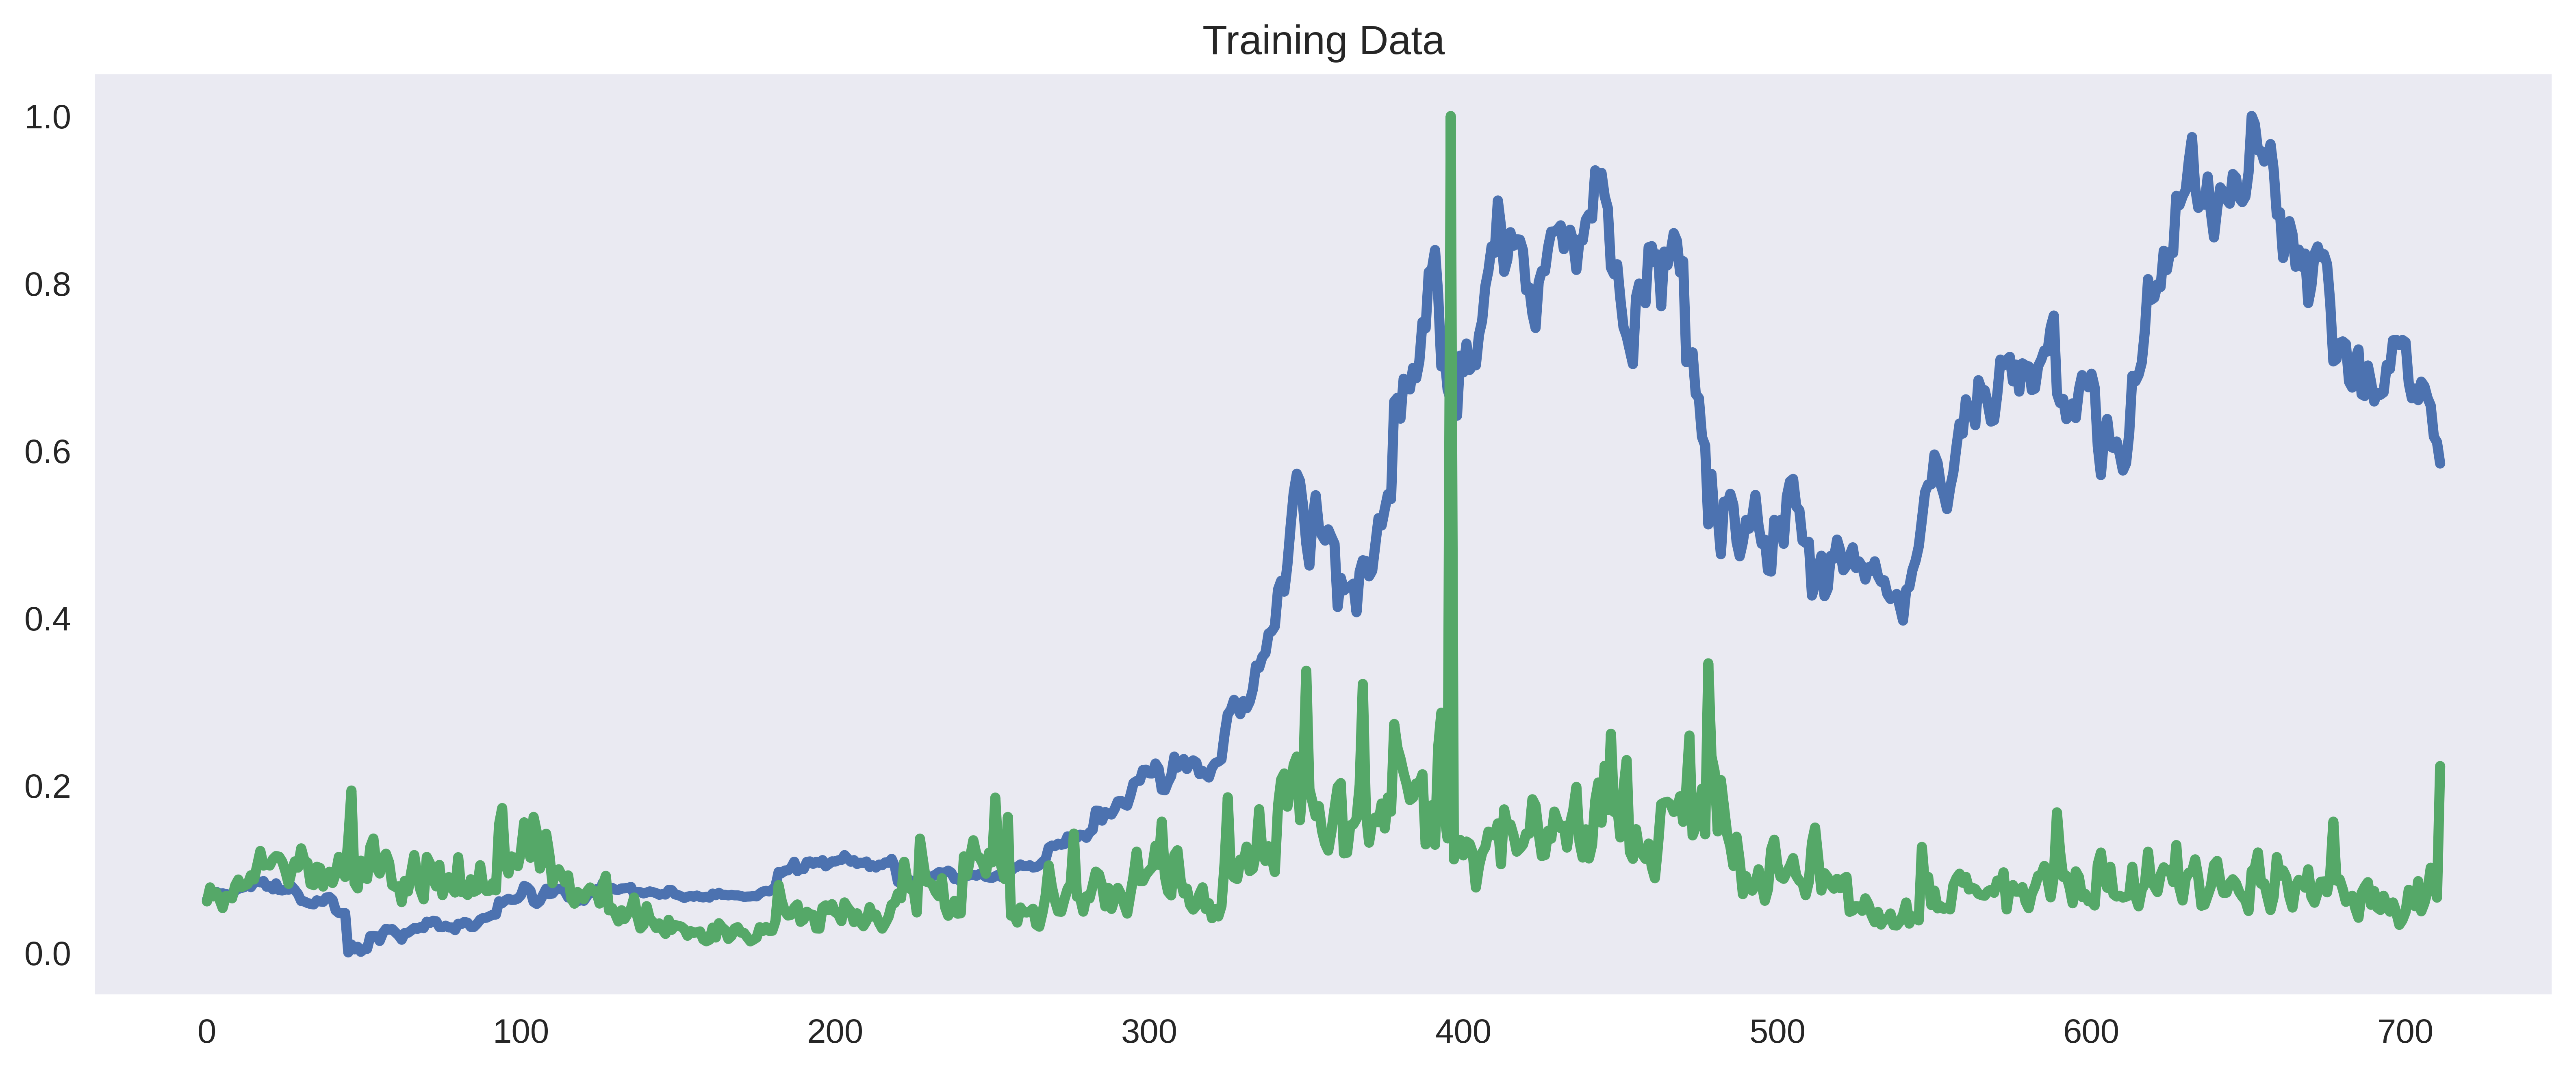

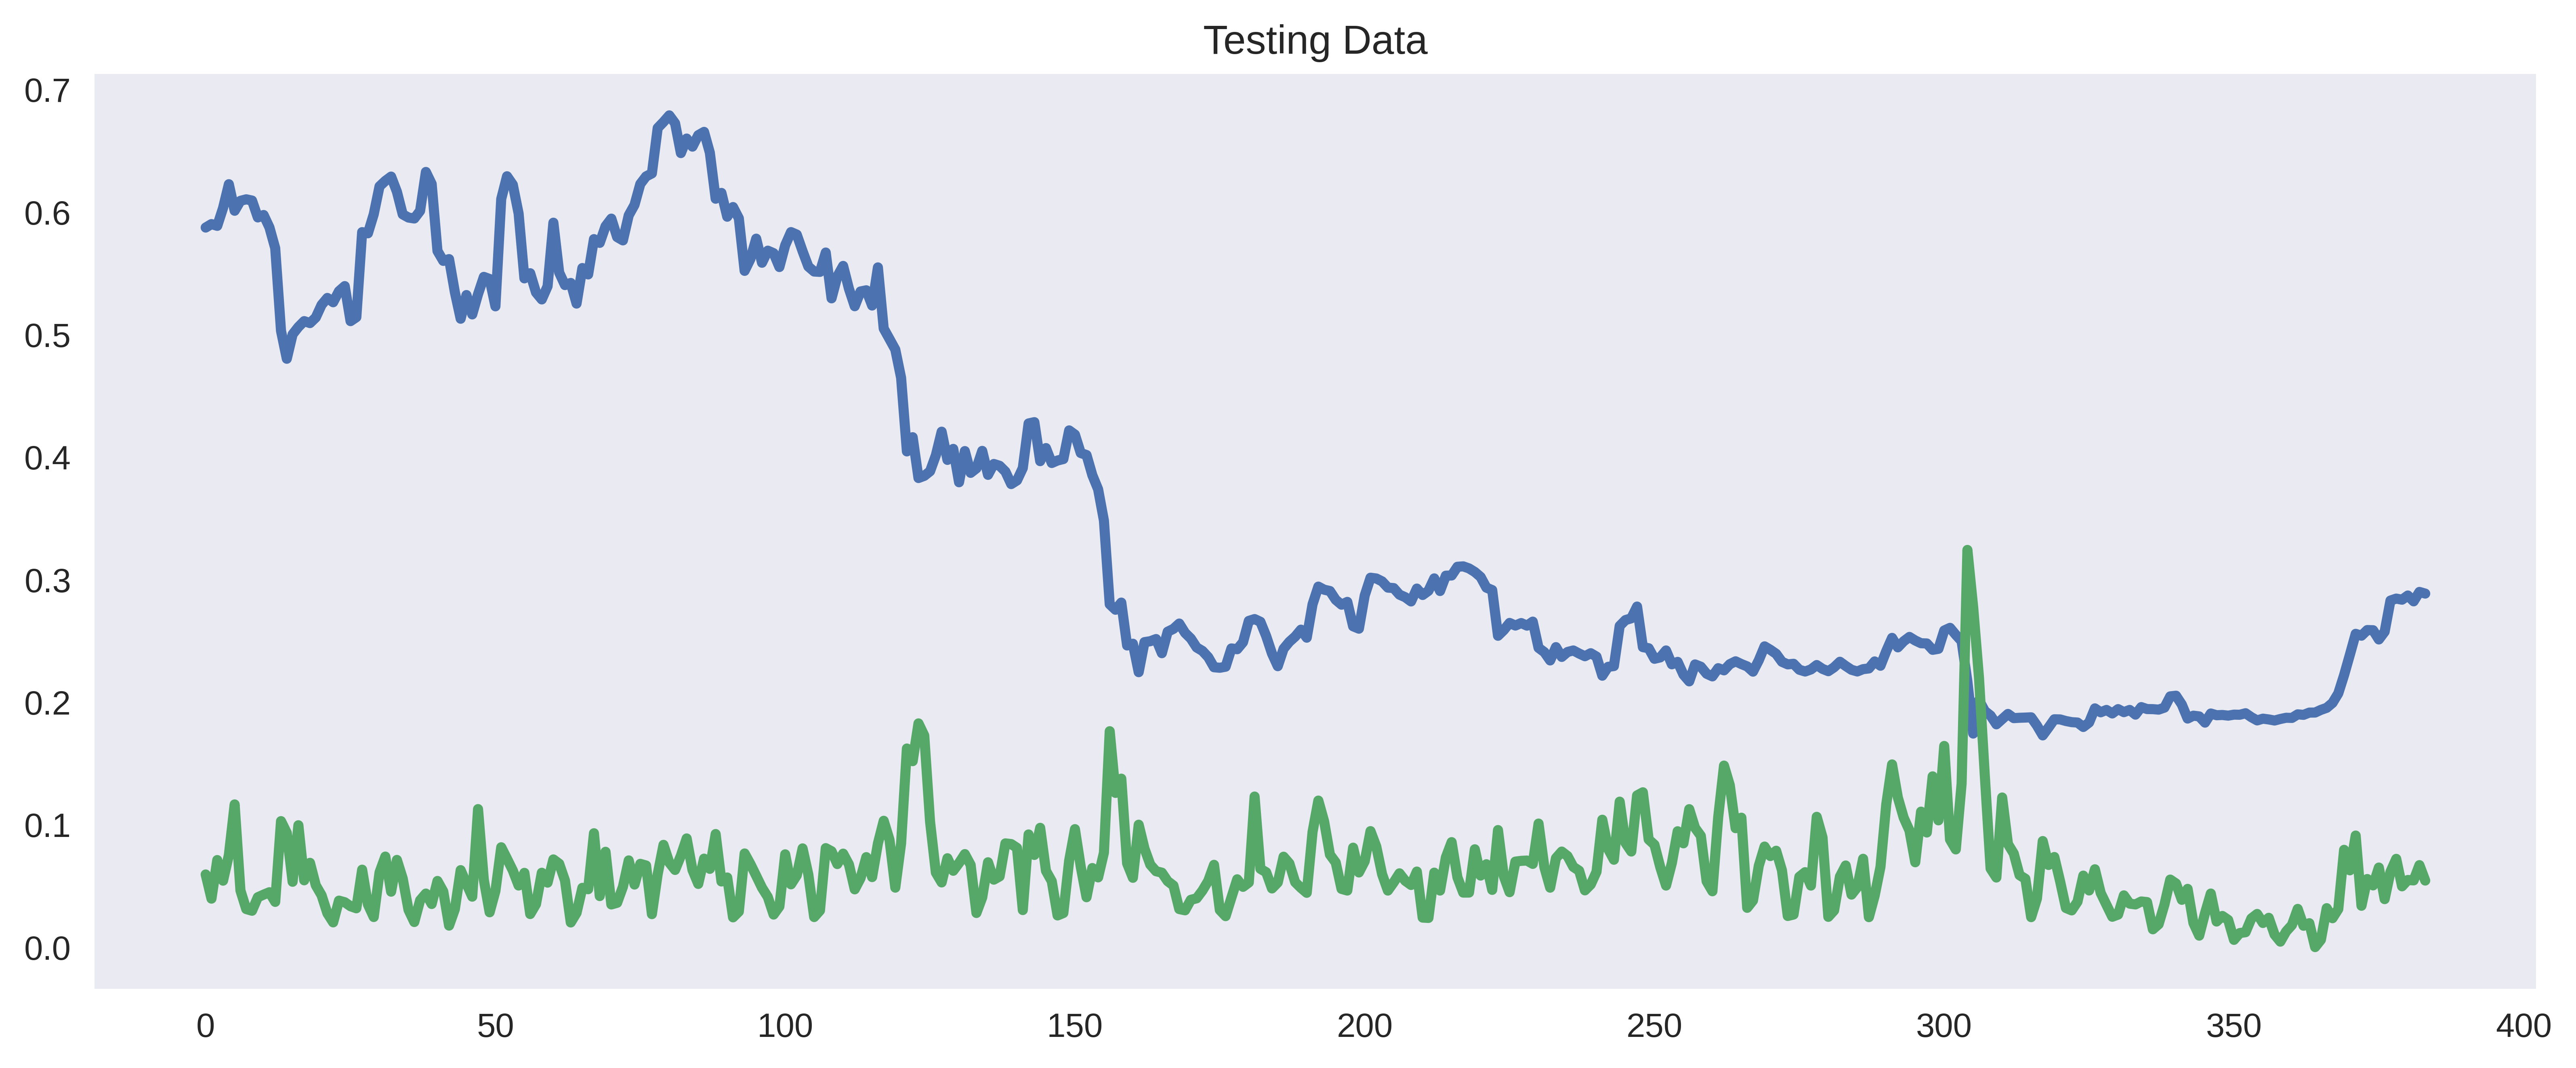

In [79]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [80]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()

regression_model.fit(X_train, y_train)

Ridge()

In [81]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9897913205018578


In [82]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.0692021 ],
       [0.07662001],
       [0.07571524],
       ...,
       [0.28425697],
       [0.29208854],
       [0.29046709]])

In [83]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [84]:
len(Predicted)

1096

In [85]:
# Append the close values to the list
close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])

In [86]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

Date
0     2020-01-27
1     2020-01-28
2     2020-01-29
3     2020-01-30
4     2020-01-31
...          ...
1091  2023-01-22
1092  2023-01-23
1093  2023-01-24
1094  2023-01-25
1095  2023-01-26

[1096 rows x 1 columns]

In [87]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

Date     Close
0     2020-01-27  0.062928
1     2020-01-28  0.070097
2     2020-01-29  0.069427
3     2020-01-30  0.072500
4     2020-01-31  0.069968
...          ...       ...
1091  2023-01-22  0.283558
1092  2023-01-23  0.286977
1093  2023-01-24  0.282217
1094  2023-01-25  0.289908
1095  2023-01-26  0.288548

[1096 rows x 2 columns]

In [88]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

Date     Close  Prediction
0     2020-01-27  0.062928    0.069202
1     2020-01-28  0.070097    0.076620
2     2020-01-29  0.069427    0.075715
3     2020-01-30  0.072500    0.078844
4     2020-01-31  0.069968    0.076164
...          ...       ...         ...
1091  2023-01-22  0.283558    0.285463
1092  2023-01-23  0.286977    0.288936
1093  2023-01-24  0.282217    0.284257
1094  2023-01-25  0.289908    0.292089
1095  2023-01-26  0.288548    0.290467

[1096 rows x 3 columns]

In [89]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [90]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

Red neuronal

TRAIN AN LSTM TIME SERIES MODEL

In [91]:
data

Date         Close       Volume        Target
0     2020-01-27   8909.819336  28647338393   9358.589844
1     2020-01-28   9358.589844  34398744403   9316.629883
2     2020-01-29   9316.629883  30682598115   9508.993164
3     2020-01-30   9508.993164  32378792851   9350.529297
4     2020-01-31   9350.529297  29432489719   9392.875000
...          ...           ...          ...           ...
1092  2023-01-23  22934.431641  26518700512  22636.468750
1093  2023-01-24  22636.468750  26405069715  23117.859375
1094  2023-01-25  23117.859375  30685366709  23032.777344
1095  2023-01-26  23032.777344  26357839322  22787.208984
1096  2023-01-27  22787.208984  26344077312           NaN

[1097 rows x 4 columns]

In [92]:
price_volume_df = data
price_volume_df

Date         Close       Volume        Target
0     2020-01-27   8909.819336  28647338393   9358.589844
1     2020-01-28   9358.589844  34398744403   9316.629883
2     2020-01-29   9316.629883  30682598115   9508.993164
3     2020-01-30   9508.993164  32378792851   9350.529297
4     2020-01-31   9350.529297  29432489719   9392.875000
...          ...           ...          ...           ...
1092  2023-01-23  22934.431641  26518700512  22636.468750
1093  2023-01-24  22636.468750  26405069715  23117.859375
1094  2023-01-25  23117.859375  30685366709  23032.777344
1095  2023-01-26  23032.777344  26357839322  22787.208984
1096  2023-01-27  22787.208984  26344077312           NaN

[1097 rows x 4 columns]

In [93]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[8.90981934e+03, 2.86473384e+10],
       [9.35858984e+03, 3.43987444e+10],
       [9.31662988e+03, 3.06825981e+10],
       ...,
       [2.31178594e+04, 3.06853667e+10],
       [2.30327773e+04, 2.63578393e+10],
       [2.27872090e+04, 2.63440773e+10]])

In [94]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [95]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [96]:
X

[array([0.0629278]),
 array([0.07009711]),
 array([0.06942678]),
 array([0.07249987]),
 array([0.06996834]),
 array([0.07064483]),
 array([0.06986987]),
 array([0.06905762]),
 array([0.06725944]),
 array([0.0741682]),
 array([0.07602739]),
 array([0.07708403]),
 array([0.07818915]),
 array([0.08220785]),
 array([0.07805323]),
 array([0.0836706]),
 array([0.0855528]),
 array([0.08376875]),
 array([0.08533013]),
 array([0.07857744]),
 array([0.07929648]),
 array([0.07539382]),
 array([0.08261238]),
 array([0.07448712]),
 array([0.07408915]),
 array([0.07533469]),
 array([0.07496311]),
 array([0.07913803]),
 array([0.07475532]),
 array([0.06982737]),
 array([0.06150124]),
 array([0.06092568]),
 array([0.0591358]),
 array([0.05797045]),
 array([0.05737849]),
 array([0.0622864]),
 array([0.06097827]),
 array([0.06045843]),
 array([0.06562675]),
 array([0.06632621]),
 array([0.06292996]),
 array([0.05012023]),
 array([0.04717321]),
 array([0.04695092]),
 array([0.04697809]),
 array([0.]),
 a

In [97]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [98]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [99]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((767, 1, 1), (329, 1, 1))

In [100]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 150)            91200     
                                                                 
 dropout (Dropout)           (None, 1, 150)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 150)            180600    
                                                                 
 dropout_1 (Dropout)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 150)               180600    
                                                                 
 dense (Dense)               (None, 1)                 151   

In [101]:
# Trai the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/20
20/20 [==============================] - 10s 96ms/step - loss: 0.1452 - val_loss: 0.1489
Epoch 2/20
20/20 [==============================] - 0s 15ms/step - loss: 0.0448 - val_loss: 0.0464
Epoch 3/20
20/20 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 8.5603e-04
Epoch 4/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 5/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 6/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 8/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0018 - val_loss: 9.9387e-04
Epoch 9/20
20/20 [==============================] - 0s 12ms/step - loss: 0.0019 - val_loss: 8.6899e-04
Epoch 10/20
20/20 [==============================] - 0s 14ms/step - loss: 0.0016 - val_loss: 0.0

In [102]:
# Make prediction
predicted = model.predict(X)

35/35 [==============================] - 1s 3ms/step


In [103]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append(i[0])

In [104]:
test_predicted

[0.069735385,
 0.07708086,
 0.07639411,
 0.07954248,
 0.07694893,
 0.07764201,
 0.07684805,
 0.07601588,
 0.07417357,
 0.0812516,
 0.0831562,
 0.0842386,
 0.08537065,
 0.089487106,
 0.08523143,
 0.09098533,
 0.092913136,
 0.091085866,
 0.09268508,
 0.0857684,
 0.08650495,
 0.08250716,
 0.08990145,
 0.0815783,
 0.08117062,
 0.08244658,
 0.082065925,
 0.08634264,
 0.081853054,
 0.07680451,
 0.06827368,
 0.06768392,
 0.06584987,
 0.06465574,
 0.064049155,
 0.069078185,
 0.0677378,
 0.067205146,
 0.07250076,
 0.07321741,
 0.069737606,
 0.056611158,
 0.053590976,
 0.05336315,
 0.053390995,
 0.005237448,
 0.014947349,
 0.008997122,
 0.012140557,
 0.0059529617,
 0.009410842,
 0.009620613,
 0.02522315,
 0.02534737,
 0.025122821,
 0.019312412,
 0.028909683,
 0.03412506,
 0.03324504,
 0.033824358,
 0.029785506,
 0.026058326,
 0.020815542,
 0.029131195,
 0.029275347,
 0.03202858,
 0.03508825,
 0.034101866,
 0.036298398,
 0.03504739,
 0.042917863,
 0.041356307,
 0.04393825,
 0.04341412,
 0.0362650

In [105]:
df_predicted = price_volume_df[1:][['Date']]
df_predicted

Date
1     2020-01-28
2     2020-01-29
3     2020-01-30
4     2020-01-31
5     2020-02-01
...          ...
1092  2023-01-23
1093  2023-01-24
1094  2023-01-25
1095  2023-01-26
1096  2023-01-27

[1096 rows x 1 columns]

In [106]:
df_predicted['predictions'] = test_predicted

In [107]:
df_predicted

Date  predictions
1     2020-01-28     0.069735
2     2020-01-29     0.077081
3     2020-01-30     0.076394
4     2020-01-31     0.079542
5     2020-02-01     0.076949
...          ...          ...
1092  2023-01-23     0.294945
1093  2023-01-24     0.298414
1094  2023-01-25     0.293584
1095  2023-01-26     0.301387
1096  2023-01-27     0.300008

[1096 rows x 2 columns]

In [108]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [109]:
df_predicted['Close'] = close[1:]

In [110]:
df_predicted

Date  predictions     Close
1     2020-01-28     0.069735  0.070097
2     2020-01-29     0.077081  0.069427
3     2020-01-30     0.076394  0.072500
4     2020-01-31     0.079542  0.069968
5     2020-02-01     0.076949  0.070645
...          ...          ...       ...
1092  2023-01-23     0.294945  0.286977
1093  2023-01-24     0.298414  0.282217
1094  2023-01-25     0.293584  0.289908
1095  2023-01-26     0.301387  0.288548
1096  2023-01-27     0.300008  0.284625

[1096 rows x 3 columns]

In [111]:
# Plot the data
interactive_plot(df_predicted, "Original Vs LSTM Prediction")

In [112]:
df

Date          Open          High           Low         Close  \
0     2020-01-27   8597.308594   8977.726563   8597.308594   8909.819336   
1     2020-01-28   8912.524414   9358.589844   8908.447266   9358.589844   
2     2020-01-29   9357.470703   9406.431641   9269.467773   9316.629883   
3     2020-01-30   9316.016602   9553.125977   9230.897461   9508.993164   
4     2020-01-31   9508.313477   9521.706055   9230.776367   9350.529297   
...          ...           ...           ...           ...           ...   
1092  2023-01-23  22721.087891  23126.486328  22654.304688  22934.431641   
1093  2023-01-24  22929.626953  23134.011719  22549.744141  22636.468750   
1094  2023-01-25  22639.267578  23722.099609  22406.076172  23117.859375   
1095  2023-01-26  23108.955078  23237.078125  22911.373047  23032.777344   
1096  2023-01-27  23024.886719  23061.599609  22672.636719  22787.208984   

         Adj Close       Volume         trend   returns  sq_returns  
0      8909.819336  28647338393   9223.978307       NaN         NaN  
1      9358.589844  34398744403   9279.995498  5.036808   25.369437  
2      9316.629883  30682598115   9335.816341 -0.448358    0.201025  
3      9508.993164  32378792851   9391.293606  2.064730    4.263111  
4      9350.529297  29432489719   9446.268075 -1.666463    2.777099  
...            ...          ...           ...       ...         ...  
1092  22934.431641  26518700512  22482.514530  0.941953    0.887275  
1093  22636.468750  26405069715  22781.652201 -1.299195    1.687907  
1094  23117.859375  30685366709  23078.732492  2.126615    4.522493  
1095  23032.777344  26357839322  23374.496086 -0.368036    0.135450  
1096  22787.208984  26344077312  23669.708117 -1.066169    1.136717  

[1097 rows x 10 columns]

In [113]:
!pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
import pandas as pd
from prophet import Prophet

In [115]:
dataframe = pd.read_csv('/content/BTC-USD (1).csv')


In [116]:
dataframe.head()


Date         Open         High          Low        Close  \
0  2020-01-27  8597.308594  8977.726563  8597.308594  8909.819336   
1  2020-01-28  8912.524414  9358.589844  8908.447266  9358.589844   
2  2020-01-29  9357.470703  9406.431641  9269.467773  9316.629883   
3  2020-01-30  9316.016602  9553.125977  9230.897461  9508.993164   
4  2020-01-31  9508.313477  9521.706055  9230.776367  9350.529297   

     Adj Close       Volume  
0  8909.819336  28647338393  
1  9358.589844  34398744403  
2  9316.629883  30682598115  
3  9508.993164  32378792851  
4  9350.529297  29432489719

In [117]:
dataframe = dataframe[["Date","Close"]]

In [118]:
dataframe.head()

Date        Close
0  2020-01-27  8909.819336
1  2020-01-28  9358.589844
2  2020-01-29  9316.629883
3  2020-01-30  9508.993164
4  2020-01-31  9350.529297

In [119]:
dataframe.columns = ['ds', 'y']
dataframe.head()

ds            y
0  2020-01-27  8909.819336
1  2020-01-28  9358.589844
2  2020-01-29  9316.629883
3  2020-01-30  9508.993164
4  2020-01-31  9350.529297

In [120]:
p = Prophet(interval_width=0.92, daily_seasonality=True)


In [121]:
model = p.fit(dataframe)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpbr5lh3ki/cofl97ph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbr5lh3ki/k7u1lpp5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63197', 'data', 'file=/tmp/tmpbr5lh3ki/cofl97ph.json', 'init=/tmp/tmpbr5lh3ki/k7u1lpp5.json', 'output', 'file=/tmp/tmpbr5lh3ki/prophet_modelfhrg7iz6/prophet_model-20230127024033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:40:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:40:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [126]:
future = p.make_future_dataframe(periods=20, freq='D')
future.tail()

ds
1112 2023-02-12
1113 2023-02-13
1114 2023-02-14
1115 2023-02-15
1116 2023-02-16

In [127]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

ds         trend    yhat_lower    yhat_upper   trend_lower  \
1112 2023-02-12  21303.299037  17086.522237  27710.473017  20597.288320   
1113 2023-02-13  21255.580555  17461.852820  27810.795459  20478.607001   
1114 2023-02-14  21207.862073  17888.038981  28056.747155  20354.947000   
1115 2023-02-15  21160.143590  18033.407365  28663.206944  20243.560937   
1116 2023-02-16  21112.425108  17665.886284  28669.004834  20128.055788   

       trend_upper  additive_terms  additive_terms_lower  \
1112  21979.981228     1141.793201           1141.793201   
1113  22004.072596     1495.943081           1495.943081   
1114  22026.976951     1709.482473           1709.482473   
1115  22049.871930     2020.539991           2020.539991   
1116  22072.766909     2106.458915           2106.458915   

      additive_terms_upper        daily  ...     weekly  weekly_lower  \
1112           1141.793201 -4661.300339  ... -32.044465    -32.044465   
1113           1495.943081 -4661.300339  ...  26.569275     26.569275   
1114           1709.482473 -4661.300339  ... -18.505304    -18.505304   
1115           2020.539991 -4661.300339  ...  73.591508     73.591508   
1116           2106.458915 -4661.300339  ... -17.946220    -17.946220   

      weekly_upper       yearly  yearly_lower  yearly_upper  \
1112    -32.044465  5835.138005   5835.138005   5835.138005   
1113     26.569275  6130.674145   6130.674145   6130.674145   
1114    -18.505304  6389.288115   6389.288115   6389.288115   
1115     73.591508  6608.248822   6608.248822   6608.248822   
1116    -17.946220  6785.705473   6785.705473   6785.705473   

      multiplicative_terms  multiplicative_terms_lower  \
1112                   0.0                         0.0   
1113                   0.0                         0.0   
1114                   0.0                         0.0   
1115                   0.0                         0.0   
1116                   0.0                         0.0   

      multiplicative_terms_upper          yhat  
1112                         0.0  22445.092238  
1113                         0.0  22751.523636  
1114                         0.0  22917.344545  
1115                         0.0  23180.683581  
1116                         0.0  23218.884023  

[5 rows x 22 columns]

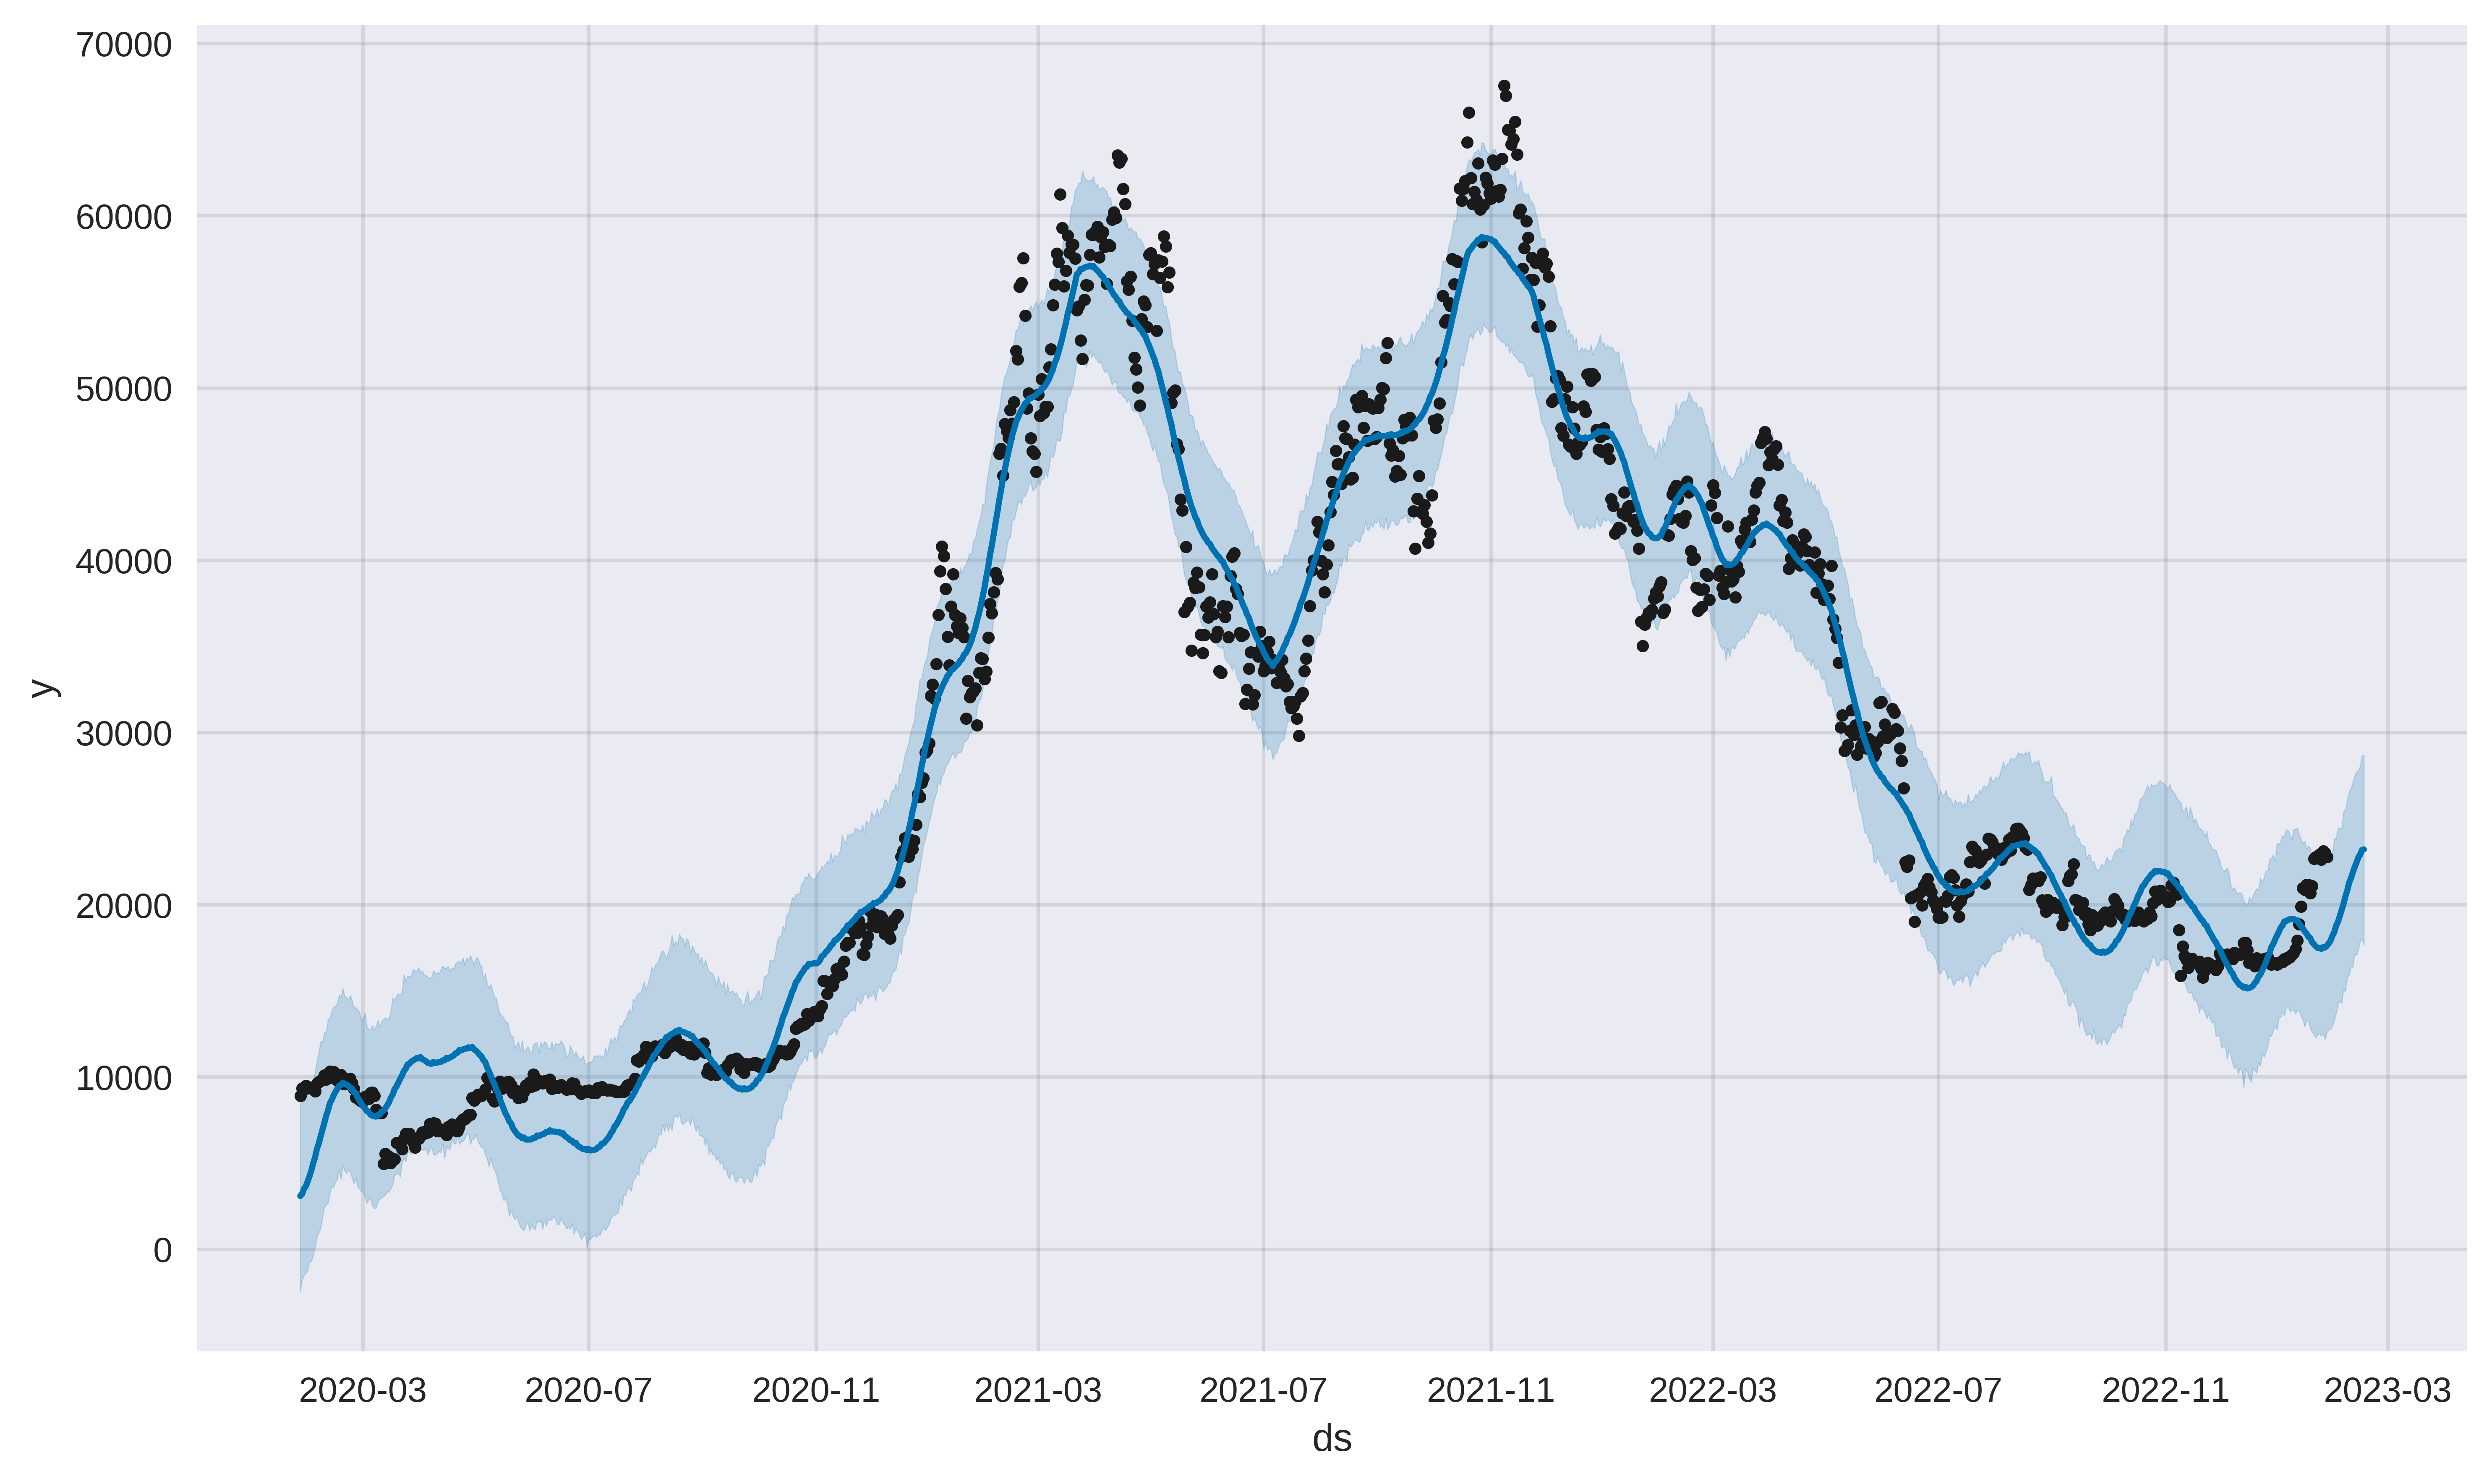

In [128]:
plot1 = p.plot(forecast_prediction)


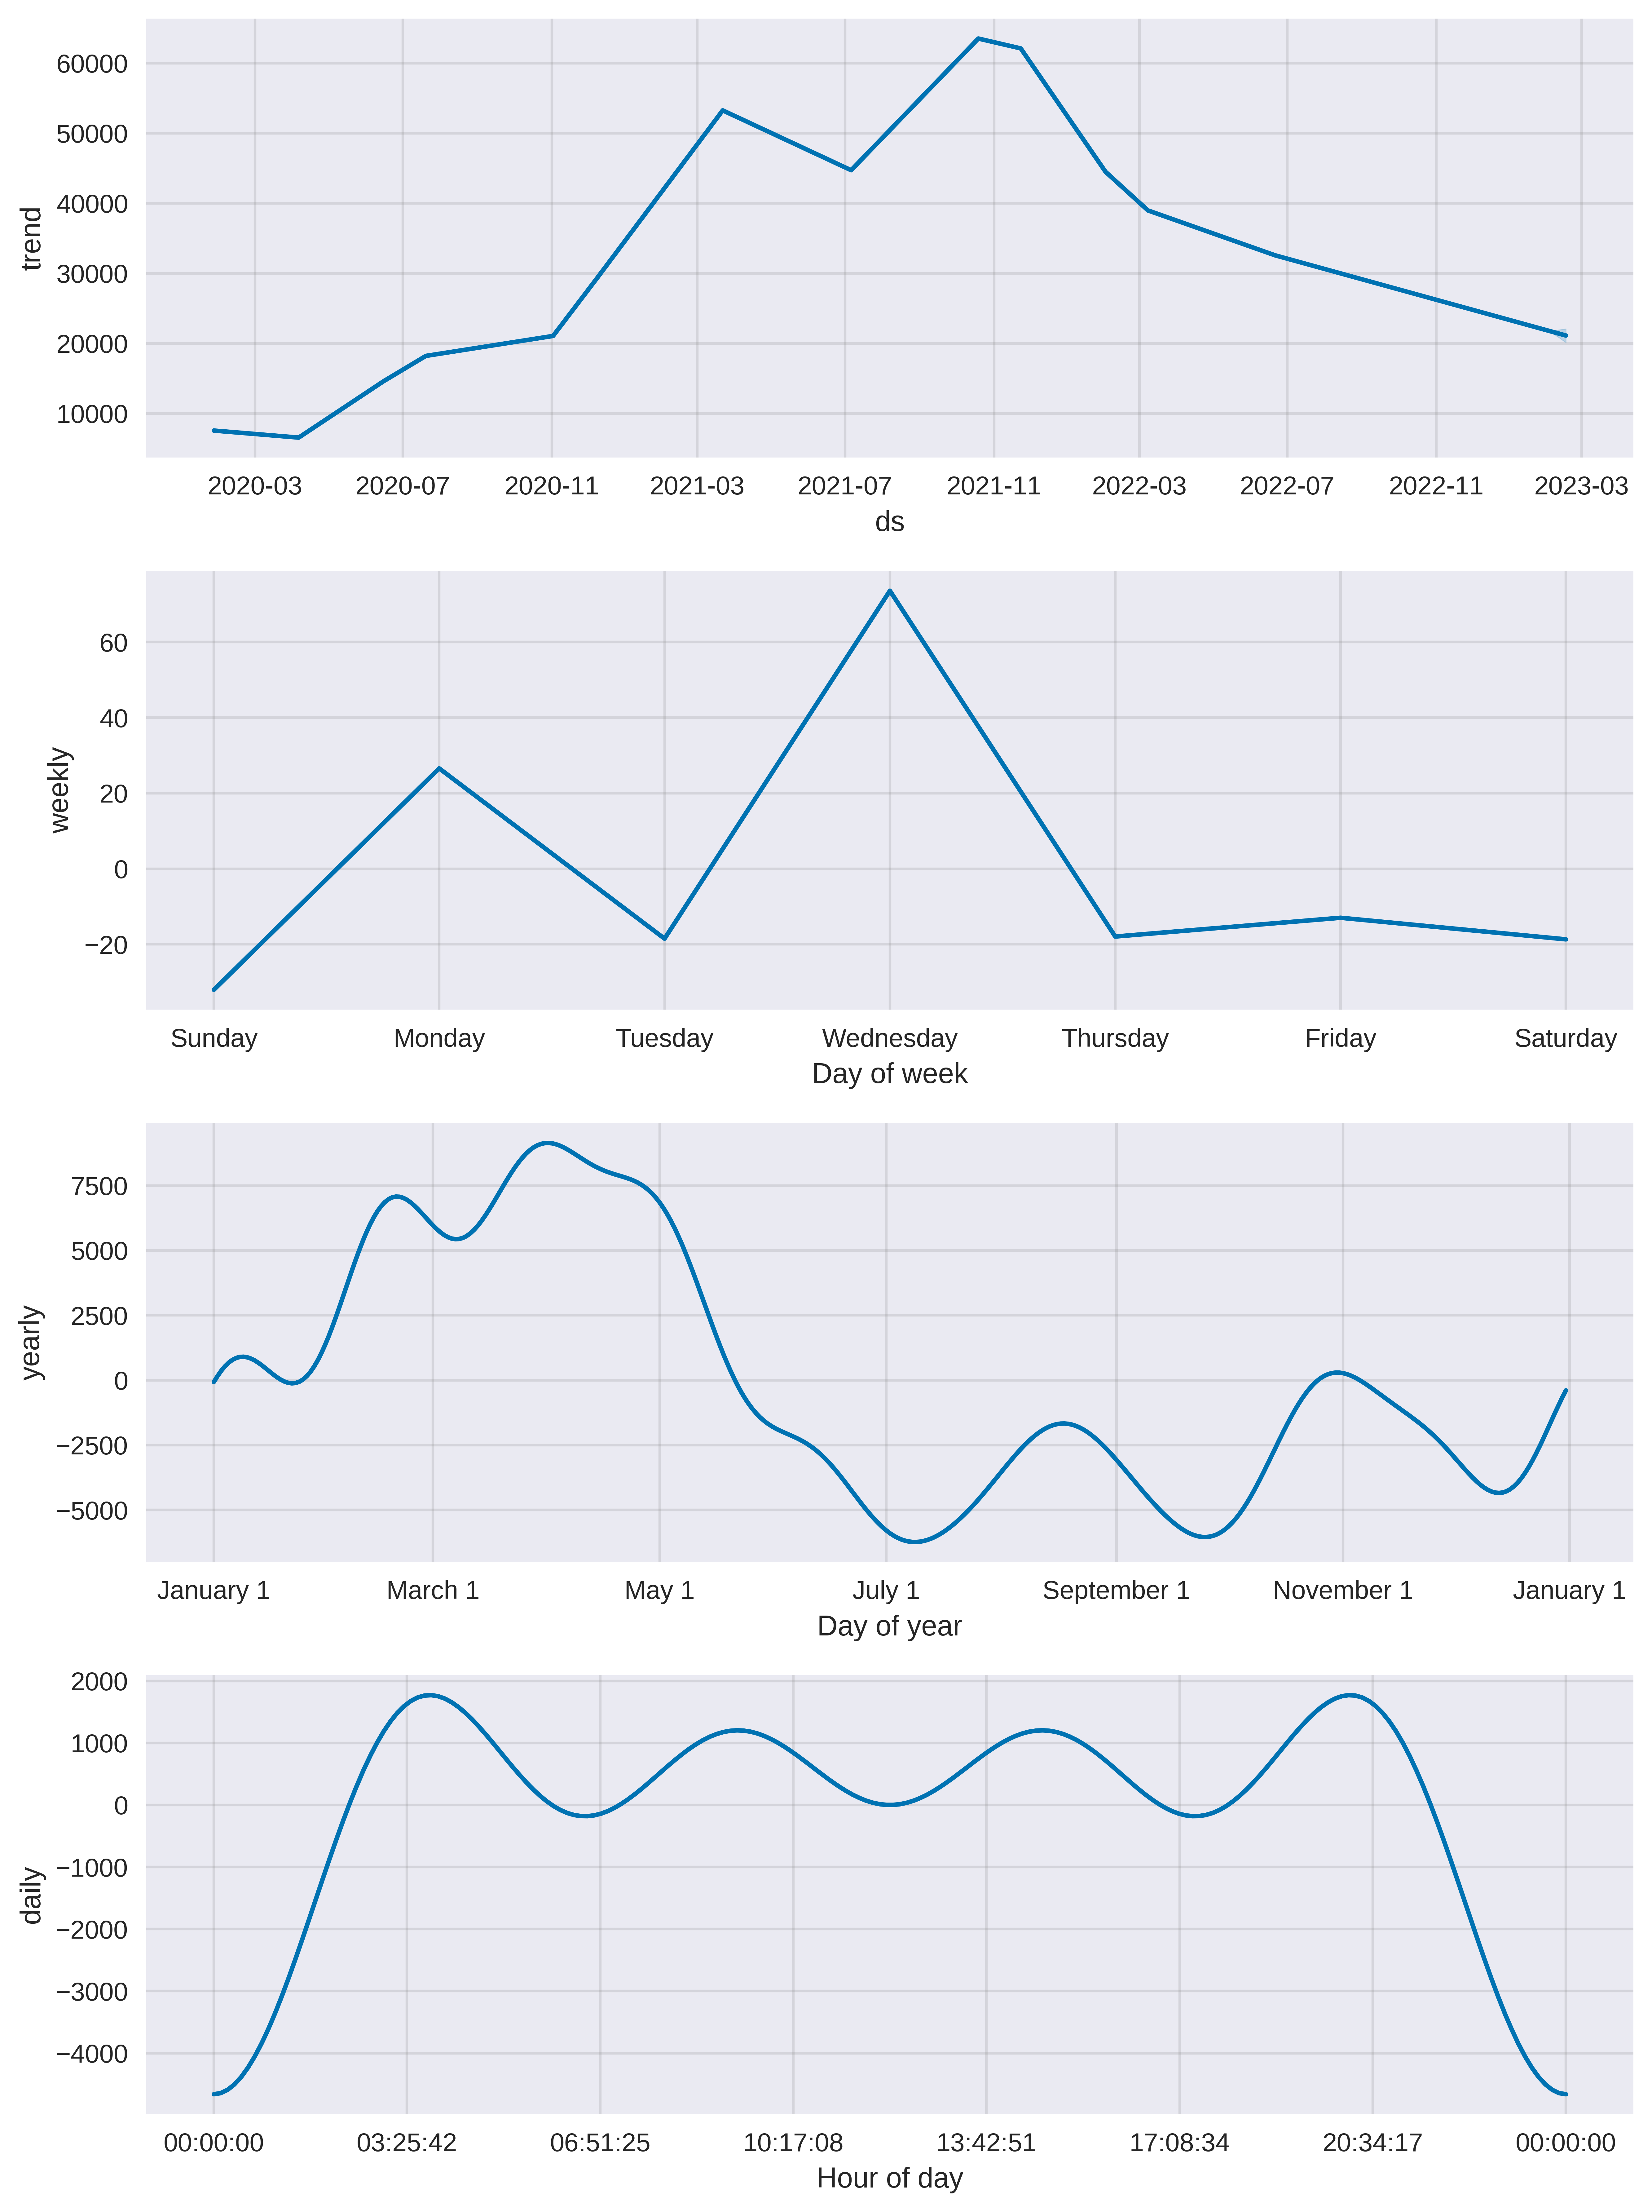

In [129]:
plot2 = p.plot_components(forecast_prediction)
